In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# Load Data

In [2]:
dataset = pd.read_pickle("resources/normalized_data/heart_failure_normalized_dataframe.pkl",compression="gzip")

# Data Modeling

In [3]:
columns = list(dataset.columns)
print(*columns, sep='\n')
# print('\n'.join(columns)) Gives the same result...

age
creatinine_phosphokinase
ejection_fraction
platelets
serum_creatinine
serum_sodium
anaemia
diabetes
high_blood_pressure
sex
smoking
time
DEATH_EVENT


In [4]:
x = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

In [5]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size = 0.8, shuffle = True, random_state = 2)

# Machine Learning Algorithms

In [6]:
from sklearn.metrics import confusion_matrix, accuracy_score

algo_accuracy_record = []  # each element is list of format - ['algo_name', algo_max_accuracy]

In [7]:
# Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier

rf_acc = []
rf_cm = []

for num_trees in range(1, 200):
    rf_classifier = RandomForestClassifier(n_estimators = num_trees, criterion = 'entropy', random_state = 0)
    rf_classifier.fit(x_train, y_train)
    rf_pred = rf_classifier.predict(x_test)

    rf_acc.append(accuracy_score(y_test,rf_pred))
    rf_cm.append(confusion_matrix(y_test,rf_pred))
    
max_acc = max(rf_acc)
max_acc_cm = rf_cm[rf_acc.index(max_acc)]
print('maximum accuracy = ' + str(max_acc))
print('confusion matrix = ')
print(max_acc_cm)
algo_accuracy_record.append(['RandomForestClassifier', max_acc])
# 0.933 without sc

maximum accuracy = 0.9137931034482759
confusion matrix = 
[[37  1]
 [ 4 16]]


In [8]:
# Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier

dt_acc = []
dt_cm = []

dt_classifier = DecisionTreeClassifier(criterion = 'entropy')
for i in range(20):
    dt_classifier.fit(x_train[:,[3,4,7,11]], y_train)
    dt_pred = dt_classifier.predict(x_test[:,[3,4,7,11]])

    dt_acc.append(accuracy_score(y_test, dt_pred))
    dt_cm.append(confusion_matrix(y_test, dt_pred))
    
max_acc = max(dt_acc)
max_acc_cm = dt_cm[dt_acc.index(max_acc)]

print('maximum accuracy = ' + str(max_acc))
print('confusion matrix = ')
print(max_acc_cm)
algo_accuracy_record.append(['DecisionTreeClassifier', max_acc])
# 0.855 without sc

maximum accuracy = 0.8448275862068966
confusion matrix = 
[[36  2]
 [ 7 13]]


In [9]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression

lr_classifier = LogisticRegression(random_state = 2)
lr_classifier.fit(x_train[:,[4,7,8,11]], y_train)
lr_pred = lr_classifier.predict(x_test[:,[4,7,8,11]])

lr_acc = accuracy_score(y_test, lr_pred)
lr_cm = confusion_matrix(y_test, lr_pred)

print('accuracy = ' + str(lr_acc))
print('confusion matrix = ')
print(lr_cm)
algo_accuracy_record.append(['LogisticRegresion', lr_acc])
# 0.888 without sc

accuracy = 0.8448275862068966
confusion matrix = 
[[37  1]
 [ 8 12]]


In [10]:
# Support Vector Classifier
from sklearn.svm import SVC
svc_classifier = SVC(kernel = 'rbf', random_state = 0)
svc_classifier.fit(x_train[:,[1,4,7,11]], y_train)
svc_pred = svc_classifier.predict(x_test[:,[1,4,7,11]])
svc_acc = accuracy_score(y_test, svc_pred)
svc_cm = confusion_matrix(y_test, svc_pred)
print(svc_acc)
print(svc_cm)
algo_accuracy_record.append(['SupportVectorClassifier', svc_acc])
# 0.9 without sc

0.8103448275862069
[[37  1]
 [10 10]]


In [11]:
# K-Nearest Neighbours Classifier
from sklearn.neighbors import KNeighborsClassifier

knn_acc = []
knn_cm = []

# using StandardScalar for K-NN generates better results
from sklearn.preprocessing import StandardScaler
k_x_train = x_train
k_y_train = y_train
k_x_test = x_test
k_y_test = y_test
k_sc = StandardScaler()
k_x_train = k_sc.fit_transform(k_x_train)
k_x_test = k_sc.transform(k_x_test)

for num_neighbours in range(1, 20):
    knn_classifier = KNeighborsClassifier(n_neighbors=num_neighbours, metric='minkowski', p=2)
    knn_classifier.fit(k_x_train[:,[4,7,11]], k_y_train)

    knn_pred = knn_classifier.predict(k_x_test[:,[4,7,11]])

    knn_acc.append(accuracy_score(k_y_test, knn_pred))
    knn_cm.append(confusion_matrix(k_y_test, knn_pred))

max_acc = max(knn_acc)
max_acc_cm = knn_cm[knn_acc.index(max_acc)]

print('maximum accuracy = ' + str(max_acc))
print('confusion matrix = ')
print(max_acc_cm)
algo_accuracy_record.append(['K-NNClassifier', max_acc])
# 0.9333 with sc

maximum accuracy = 0.8448275862068966
confusion matrix = 
[[37  1]
 [ 8 12]]


In [12]:
# Naive Bayes Classifier
from sklearn.naive_bayes import GaussianNB

nb_classifier = GaussianNB()
nb_classifier.fit(x_train[:,[4,6,7,8,11]], y_train)
nb_pred = nb_classifier.predict(x_test[:,[4,6,7,8,11]])

nb_acc = accuracy_score(y_test, nb_pred)
nb_cm = confusion_matrix(y_test, nb_pred)

print('maximum accuracy = ' + str(nb_acc))
print('confusion matrix = ')
print(nb_cm)
algo_accuracy_record.append(['NaiveBayesClassifier', nb_acc])
# 0.866 without sc

maximum accuracy = 0.7758620689655172
confusion matrix = 
[[37  1]
 [12  8]]


In [13]:
# Gradient Boosting Classifier
from sklearn.ensemble import GradientBoostingClassifier

gb_classifier = GradientBoostingClassifier(max_depth=2, random_state=1)
gb_classifier.fit(x_train[:, [4,7,11]], y_train)
gb_pred = gb_classifier.predict(x_test[:, [4,7,11]])

gb_acc = accuracy_score(y_test, gb_pred)
gb_cm = confusion_matrix(y_test, gb_pred)

print('maximum accuracy = ' + str(gb_acc))
print('confusion matrix = ')
print(gb_cm)
algo_accuracy_record.append(['GradientBoostingClassifier', gb_acc])
# 0.911 without sc

maximum accuracy = 0.8448275862068966
confusion matrix = 
[[35  3]
 [ 6 14]]


In [14]:
# LGBM Classifier
from lightgbm import LGBMClassifier

lg_classifier = LGBMClassifier(max_depth=2, random_state=4)
lg_classifier.fit(x_train[:,[3,4,7,8,11]], y_train)
lg_pred = lg_classifier.predict(x_test[:,[3,4,7,8,11]])

lg_acc = accuracy_score(y_test, lg_pred)
lg_cm = confusion_matrix(y_test, lg_pred)

print('maximum accuracy = ' + str(lg_acc))
print('confusion matrix = ')
print(lg_cm)
algo_accuracy_record.append(['LGBMClassifier', lg_acc])
# 0.911 without sc

maximum accuracy = 0.8620689655172413
confusion matrix = 
[[36  2]
 [ 6 14]]


In [15]:
# Extra Trees Classifier
from sklearn.ensemble import ExtraTreesClassifier

et_classifier = ExtraTreesClassifier(n_estimators = 1000, max_depth=6, ccp_alpha=0.01)
et_classifier.fit(x_train[:,[3,4,7,8,11]], y_train)

et_pred = et_classifier.predict(x_test[:,[3,4,7,8,11]])

et_acc = accuracy_score(y_test, et_pred)
et_cm = confusion_matrix(y_test, et_pred)

print('maximum accuracy = ' + str(et_acc))
print('confusion matrix = ')
print(et_cm)
algo_accuracy_record.append(['ExtraTreesClassifier', et_acc])
# 0.911 without sc

maximum accuracy = 0.8103448275862069
confusion matrix = 
[[37  1]
 [10 10]]


In [16]:
# AdaBoost Classifier
from sklearn.ensemble import AdaBoostClassifier

ad_clf = AdaBoostClassifier(n_estimators = 1000, learning_rate=0.001)
ad_clf.fit(x_train[:,[4,7,11]], y_train)
ad_pred = ad_clf.predict(x_test[:,[4,7,11]])

ad_acc = accuracy_score(y_test, ad_pred)
ad_cm = confusion_matrix(y_test, ad_pred)

print('maximum accuracy = ' + str(ad_acc))
print('confusion matrix = ')
print(ad_cm)
algo_accuracy_record.append(['AdaBoostClassifier', ad_acc])
# 0.9 without sc

maximum accuracy = 0.8448275862068966
confusion matrix = 
[[37  1]
 [ 8 12]]


In [17]:
algo_accuracy_record

[['RandomForestClassifier', 0.9137931034482759],
 ['DecisionTreeClassifier', 0.8448275862068966],
 ['LogisticRegresion', 0.8448275862068966],
 ['SupportVectorClassifier', 0.8103448275862069],
 ['K-NNClassifier', 0.8448275862068966],
 ['NaiveBayesClassifier', 0.7758620689655172],
 ['GradientBoostingClassifier', 0.8448275862068966],
 ['LGBMClassifier', 0.8620689655172413],
 ['ExtraTreesClassifier', 0.8103448275862069],
 ['AdaBoostClassifier', 0.8448275862068966]]

## Summary

In [18]:
algo_accuracy_record

[['RandomForestClassifier', 0.9137931034482759],
 ['DecisionTreeClassifier', 0.8448275862068966],
 ['LogisticRegresion', 0.8448275862068966],
 ['SupportVectorClassifier', 0.8103448275862069],
 ['K-NNClassifier', 0.8448275862068966],
 ['NaiveBayesClassifier', 0.7758620689655172],
 ['GradientBoostingClassifier', 0.8448275862068966],
 ['LGBMClassifier', 0.8620689655172413],
 ['ExtraTreesClassifier', 0.8103448275862069],
 ['AdaBoostClassifier', 0.8448275862068966]]

Highest accuracy was achieved by Random Forest Classifier and K-NN Classifier

In [19]:
algo_acc = np.transpose(algo_accuracy_record)
x_plot = algo_acc[0]
y_plot = np.round(np.array(algo_acc[1], dtype=np.float32)*100, 2)

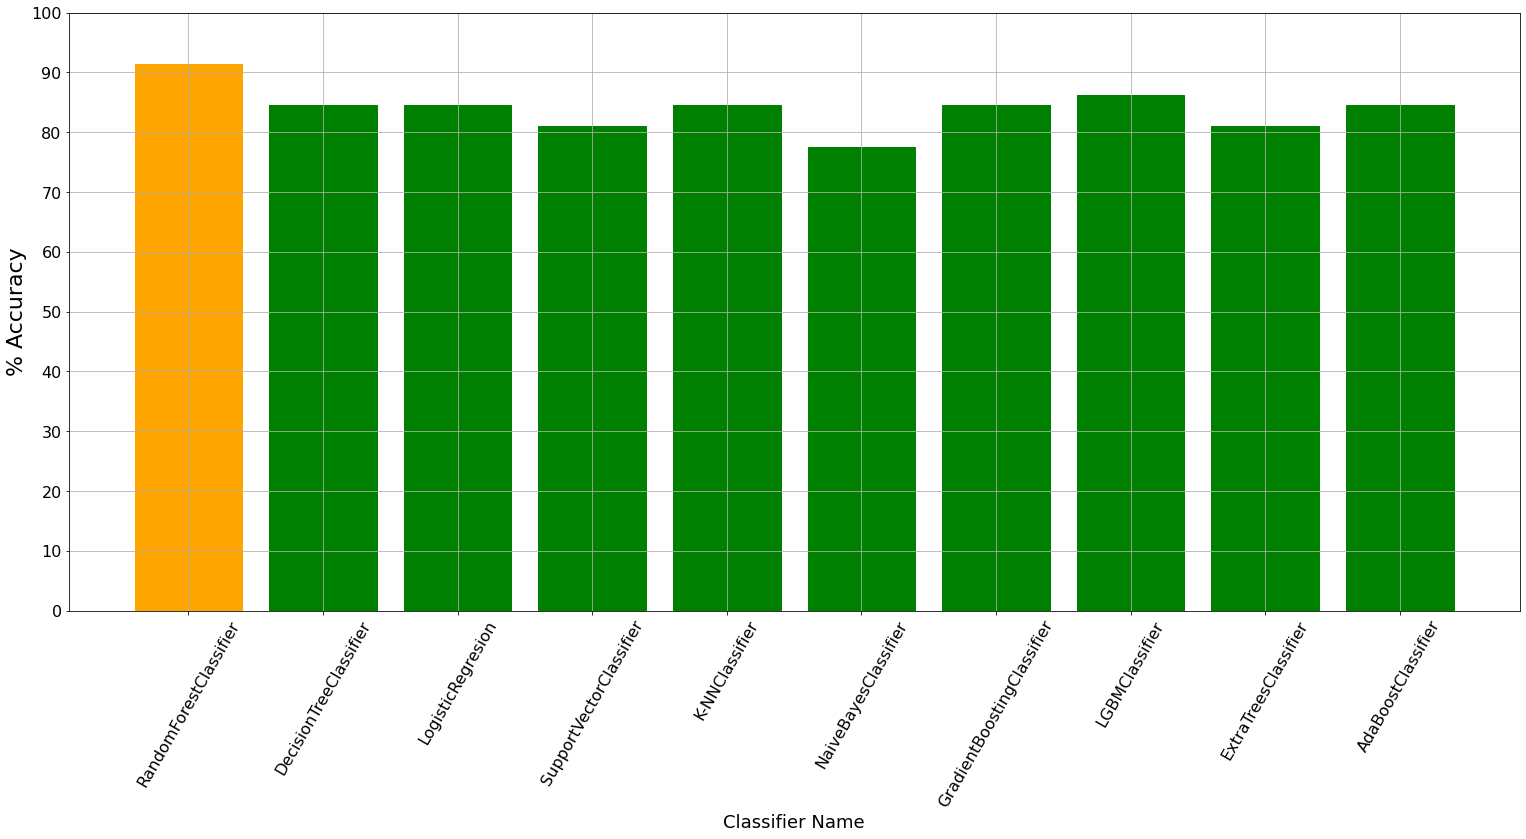

In [20]:
# We plot bar graphs of accuracies of all models and highlight the models with maximum accuracy in orange color.
fig = plt.figure(figsize=(26,11))
barlist = plt.bar(x_plot,y_plot)
for i in range(len(barlist)):
    if (y_plot[i] == max(y_plot)):
        barlist[i].set_color('orange')
    else:
        barlist[i].set_color('g')
plt.xlabel('Classifier Name', fontsize = 18)
plt.ylabel('% Accuracy', fontsize = 22)
plt.xticks(x_plot, fontsize = 16)
plt.yticks([0,10,20,30,40,50,60,70,80,90,100], fontsize = 16)
plt.xticks(rotation = 60)
plt.grid(True)
plt.style.use(plt.style.available[8])
plt.show()